<a href="https://colab.research.google.com/github/ravitejagvs/The-best-classifier/blob/master/simple_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The basic computation unit in TensorFlow is a graph. A TensorFlow project is typically structured into 2 parts:
1. A construction phase where you design the computational graph, and
2. An analysis phase where you run the graph and perform calculations on it.

Let’s start off by importing the required packages.

In [0]:
import tensorflow as tf
from sklearn.datasets import load_boston
from sklearn.preprocessing import scale
from matplotlib import pyplot as plt

Now get the data and restructure it (split it into a training set, validation set and a test set).

In [0]:
# Get the data
total_features, total_prices = load_boston(True)

# Keep 300 samples for training
train_features = scale(total_features[:300])
train_prices = total_prices[:300]

# Keep 100 samples for validation
valid_features = scale(total_features[300:400])
valid_prices = total_prices[300:400]

# Keep remaining samples as test set
test_features = scale(total_features[400:])
test_prices = total_prices[400:]

The `True` passed to `load_boston()` lets it know that we want features and prices in separate `numpy` arrays.

Every piece of data in TensorFlow is represented by a `node` in the overall computational graph of your project. Nodes in TensorFlow are also called operations, or ops in short. A tensor is basically an n-dimensional array.<br>
Each op takes zero or more tensors as input, performs some calculations, and returns zero out more tensors as output.

Notice the zero on both sides — an op can map zero inputs to n outputs (a constant tensor), n inputs to zero outputs (a placeholder in memory, or a variable) and various other useful combinations.

In [0]:
w = tf.Variable(tf.truncated_normal([13, 1], mean=0.0, stddev=1.0, dtype=tf.float64))
b = tf.Variable(tf.zeros(1, dtype = tf.float64))

`tf.Variable()` defines a variable tensor. It takes an initial value as an argument. Here, we give `tf.truncated_normal()` as an initial value, which generates a regularised set of numbers from the normal probability distribution. Choosing a random set of initial weights is considered a good practise in machine learning. `tf.zeros()` works similar to `numpy.zeros()`.

Define a function which calculates predictions and error,

In [0]:
def calc(x, y):
    # Returns predictions and error
    predictions = tf.add(b, tf.matmul(x, w))
    error = tf.reduce_mean(tf.square(y - predictions))
    return [ predictions, error ]

`tf.add()` does what you’d expect, `tf.matmul()` multiplies matrices, `tf.reduce_mean()` computes the mean of all elements in the tensor passed to it, and `tf.square()` squares each element in the tensor passed to it.

In [0]:
y, cost = calc(train_features, train_prices)
# Feel free to tweak these 2 values:
learning_rate = 0.025
epochs = 3000
points = [[], []] # You'll see later why we need this

Every graph in TensorFlow is run in an environment called a **session**. The session takes care of your graph, so you don’t have to worry about things going wrong in the computation. You can take control of the graph to do more powerful things with it, but for now we’ll let TensorFlow handle that for us.

In [0]:
init = tf.global_variables_initializer()
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

When we have variable tensors in our neural network, we need to explicitly ask TensorFlow to initialise them for us before using the graph. 

`tf.global_variables_initializer()` returns an op that does exactly that. TensorFlow also provides an API that performs gradient descent for us. We just have to call `tf.train.GradientDescentOptimizer(learning_rate)` and ask it to `minimize(cost)` for us. We catch this op in `optimizer`.

673.14216853076
78.91364979360661
78.74319100715486
78.72866810963248
78.72617211289321
78.72555103617803
78.72537385304494
78.7253211071508
78.7253051782167
78.72530034080312
78.72529886810963
78.7252984192316
78.72529828233027
78.72529824056397
78.72529822781958
78.72529822393047
78.72529822274356
78.72529822238133
78.7252982222708
78.72529822223704
78.72529822222675
78.7252982222236
78.72529822222265
78.72529822222236
78.72529822222225
78.72529822222224
78.72529822222222
78.72529822222224
78.72529822222224
78.72529822222222


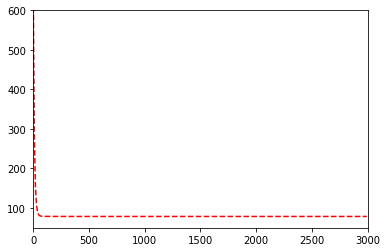

Validation error = 104.34367777777744 

Test error = 123.33357347589033 



In [0]:
with tf.Session() as sess:

    sess.run(init)

    for i in list(range(epochs)):

        sess.run(optimizer)

        if i % 10 == 0.:
            points[0].append(i+1)
            points[1].append(sess.run(cost))

        if i % 100 == 0:
            print(sess.run(cost))

    plt.plot(points[0], points[1], 'r--')
    plt.axis([0, epochs, 50, 600])
    plt.show()

    valid_cost = calc(valid_features, valid_prices)[1]

    print('Validation error =', sess.run(valid_cost), '\n')

    test_cost = calc(test_features, test_prices)[1]

    print('Test error =', sess.run(test_cost), '\n')